**扩展Jupyter访问阿里云日志服务**

# 配置日志服务Jupyter扩展

- 安装配置请参考：https://yq.aliyun.com/articles/689911

In [12]:
%reload_ext aliyun.log.ext.jupyter_magic

In [13]:
%manage_log cn-hangzhou.log.aliyuncs.com a b dashboard-demo ddos-access-log

连接中...
{"errorCode": "Unauthorized", "errorMessage": "AccessKeyId not found: a", "requestId": "5C6E587ED289A85FE4A4B2F1"}


In [14]:
%manage_log

# %log查询，默认过去15分钟

In [4]:
%log host: www.aa.mock-domain.com | select ip_to_province(real_client_ip) as province, count(1) as pv group by province order by pv desc


变量名：log_df


TransientProgressBar(value=0.0)

InstancesProgress()

DFViewWidget()

,province,pv
0,-1,727
1,北京市,259
2,广东省,254
3,台湾省,160
4,重庆市,148
5,四川省,143
6,香港特别行政区,143
7,列宁格勒,136
8,贵州省,129
9,福建省,126


In [15]:
type(log_df)

pandas.core.frame.DataFrame

In [5]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
province    18 non-null object
pv          18 non-null object
dtypes: object(2)
memory usage: 368.0+ bytes


# %%log查询，配置时间

In [6]:
%%log -1day ~ now
* | 
select date_format(date_trunc('hour', __time__), '%H:%i') as dt,  
        count(1)%100 as pv, 
        round(sum(if(status < 400, 1, 0))*100.0/count(1), 1) AS ratio
        group by date_trunc('hour', __time__) 
        order by dt limit 1000

变量名：log_df


TransientProgressBar(value=0.0)

InstancesProgress()

DFViewWidget()

,dt,pv,ratio
0,00:00,28,80.2
1,01:00,78,80.2
2,02:00,94,80.2
3,03:00,44,80.3
4,04:00,56,80.3
5,05:00,0,80.2
6,06:00,0,80.2
7,07:00,58,80.3
8,08:00,42,80.2
9,09:00,0,80.2


In [7]:
%log host: www.aa.mock-domain.com

变量名：log_df


TransientProgressBar(value=0.0)

InstancesProgress()

DFViewWidget()

,__time__,__source__,__topic__,body_bytes_sent,cc_action,cc_blocks,cc_phase,content_type,host,http_cookie,...,ua_browser_type,ua_browser_version,ua_device_type,ua_os,ua_os_family,upstream_addr,upstream_ip,upstream_response_time,upstream_status,user_id
0,2019-02-21 15:18:00,1.2.3.4,ddos_access_log,6688,none,,,image/jgp,www.aa.mock-domain.com,a1=y1;i2=t2,...,,,,,,118.120.156.13:80,110.120.151.20,0.555,200,mqyz7undl
1,2019-02-21 15:18:00,1.2.3.4,ddos_access_log,6974,none,1,,text/xml,www.aa.mock-domain.com,e1=z1;k2=m2,...,,,,windows_7,,116.120.151.2:80,103.120.150.17,0.231,200,dmpdl77
2,2019-02-21 15:18:01,1.2.3.4,ddos_access_log,4437,none,1,,text/xml,www.aa.mock-domain.com,u1=b1;e2=r2,...,,9.0,computer,,windows,102.120.150.4:80,118.120.154.5,0.666,404,ufqkjn0zb4
3,2019-02-21 15:18:01,1.2.3.4,ddos_access_log,5658,none,,,image/jgp,www.aa.mock-domain.com,p1=w1;g2=j2,...,,,,,ios,111.120.160.18:80,104.120.154.0,0.435,300,plqgxff959
4,2019-02-21 15:18:01,1.2.3.4,ddos_access_log,7467,none,,,image/png,www.aa.mock-domain.com,f1=j1;o2=c2,...,,,,windows_7,,103.120.152.9:80,113.120.156.9,0.503,300,2wq0cd
5,2019-02-21 15:18:01,1.2.3.4,ddos_access_log,8420,none,,static_whitelist,text/avi,www.aa.mock-domain.com,p1=i1;x2=l2,...,,10,computer,ios8_1_iphone,,102.120.153.0:80,120.120.154.10,0.043,200,2ndrkx
6,2019-02-21 15:18:02,1.2.3.4,ddos_access_log,3181,none,,,text/html,www.aa.mock-domain.com,k1=z1;i2=l2,...,,9.0,computer,,windows,112.120.159.1:80,116.120.155.12,0.841,200,j86q75s
7,2019-02-21 15:18:02,1.2.3.4,ddos_access_log,237,pass,,,text/x-flv,www.aa.mock-domain.com,r1=r1;p2=g2,...,,9.0,,ios8_1_iphone,windows,118.120.156.11:80,118.120.160.9,0.049,200,05yr5g6dx
8,2019-02-21 15:18:02,1.2.3.4,ddos_access_log,4095,pass,,,image/jgp,www.aa.mock-domain.com,q1=d1;o2=w2,...,,10,unknown,ios8_1_iphone,ios,102.120.160.4:80,120.120.151.5,0.469,200,cp61aq
9,2019-02-21 15:18:02,1.2.3.4,ddos_access_log,665,none,,,text/avi,www.aa.mock-domain.com,r1=p1;y2=z2,...,web_browser,,,,,114.120.155.13:80,104.120.154.7,0.595,200,p862l1fu92


# %fetch全量拉取

In [16]:
%fetch 2019-1-31 10:0:0+8:00 ~ 2019-1-31 10:00:10+8:00

变量名：log_df


TransientProgressBar(value=0.0)

InstancesProgress()

DFViewWidget()

,__time__,__source__,__topic__,body_bytes_sent,cc_action,cc_blocks,cc_phase,content_type,host,http_cookie,...,ua_browser_type,ua_browser_version,ua_device_type,ua_os,ua_os_family,upstream_addr,upstream_ip,upstream_response_time,upstream_status,user_id
0,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,4222,close,,,text/avi,www.ccd.mock-domain.com,y1=g1;g2=c2,...,,10,,,,107.120.155.19:80,113.120.159.6,0.828,400,5opgoe
1,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,5564,close,,,text/avi,www.dad.mock-domain.com,q1=x1;r2=q2,...,web_browser,10,,ios8_1_iphone,,115.120.153.9:80,112.120.154.13,0.892,200,lxoyf6emz3
2,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,8562,captcha,,,image/png,www.bac.mock-domain.com,f1=x1;o2=j2,...,web_browser,,computer,windows_7,windows,115.120.159.1:80,114.120.155.16,0.365,200,7t22id6
3,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,462,none,,,text/xml,www.cd.mock-domain.com,g1=x1;b2=y2,...,robot,10,computer,windows_7,windows,116.120.158.5:80,111.120.160.0,0.729,300,5m2qqov2
4,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,4817,none,,,image/png,www.db.mock-domain.com,k1=n1;e2=q2,...,,,,windows_7,windows,118.120.153.13:80,111.120.157.1,0.473,200,7bkyz4
5,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,2318,none,1,static_whitelist,image/png,www.ba.mock-domain.com,u1=h1;j2=t2,...,,10,,,windows,104.120.160.16:80,114.120.157.13,0.282,300,8bml4hthq8
6,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,105,none,,,text/mp4,www.aba.mock-domain.com,s1=t1;h2=a2,...,,,unknown,,,115.120.156.3:80,111.120.160.3,0.301,200,0g9p0ddk8
7,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,4500,none,1,,image/jgp,www.bbb.mock-domain.com,g1=p1;z2=y2,...,web_browser,,computer,,ios,105.120.151.10:80,106.120.157.4,0.638,502,x8porfk
8,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,7435,none,,,text/avi,www.bbb.mock-domain.com,p1=n1;t2=o2,...,,10,unknown,windows_7,windows,107.120.153.2:80,103.120.150.14,0.844,200,ygpjcc
9,2019-01-31 10:00:00,1.2.3.4,ddos_access_log,2407,none,,,image/jgp,www.bdd.mock-domain.com,l1=p1;h2=j2,...,,,computer,,,101.120.155.10:80,110.120.154.8,0.472,300,v9wbv1i


# 返回Dataframe，无缝衔接PyData计算

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)
import seaborn as sns

In [17]:
%log host: www.a?.mock* | select body_bytes_sent, host limit 100000

变量名：log_df


TransientProgressBar(value=0.0)

InstancesProgress()

DFViewWidget()

,body_bytes_sent,host
0,8576,www.ad.mock-domain.com
1,4566,www.ac.mock-domain.com
2,8262,www.aa.mock-domain.com
3,6215,www.ad.mock-domain.com
4,8668,www.aa.mock-domain.com
5,5493,www.ac.mock-domain.com
6,1591,www.ab.mock-domain.com
7,8561,www.ad.mock-domain.com
8,3757,www.ac.mock-domain.com
9,6065,www.aa.mock-domain.com


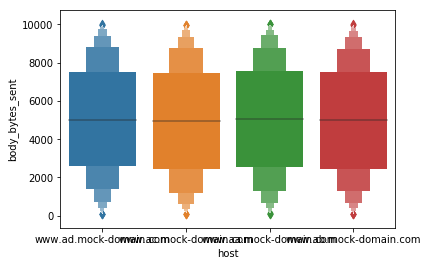

In [18]:
log_df['body_bytes_sent'] = log_df['body_bytes_sent'].astype(int)
sns.boxenplot(x='host', y='body_bytes_sent', data=log_df);